<a href="https://colab.research.google.com/github/DanielRaiicHu/curso_de_estadisticas_2/blob/main/Inicial.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

***
# <font color=green size=10>CURSO DE ESTAD√çSTICA - PARTE 2</font>
***

In [1]:

import pandas, numpy, scipy, matplotlib

print('Versi√≥n de pandas -> %s' % pandas.__version__)
print('Versi√≥n de numpy -> %s' % numpy.__version__)
print('Versi√≥n de scipy -> %s' % scipy.__version__)
print('Versi√≥n de matplotlib -> %s' % matplotlib.__version__)

Versi√≥n de pandas -> 2.2.2
Versi√≥n de numpy -> 2.0.2
Versi√≥n de scipy -> 1.16.0
Versi√≥n de matplotlib -> 3.10.0


# <font color=green>1 CONOCIENDO LOS DATOS</font>
***

## <font color=green>1.1 Dataset del proyecto</font>
***

### Encuesta Nacional por Muestreo de Hogares - 2015

La **Encuesta Nacional por Muestreo de Hogares - ENMH** en Brasil anualmente investiga, de manera permanente, caracter√≠sticas generales de la poblaci√≥n, educaci√≥n, trabajo, ingresos, vivienda y otras, con frecuencia variables, de acuerdo a las necesidades de informaci√≥n del pa√≠s, tales como las caracter√≠sticas de migraci√≥n, fecundidad, nupcialidad, salud, seguridad alimentaria, entre otros temas. La recopilaci√≥n de estas estad√≠sticas constituye, durante los 49 a√±os de realizaci√≥n de la investigaci√≥n, un importante instrumento para la formulaci√≥n, validaci√≥n y evaluaci√≥n de pol√≠ticas orientadas al desarrollo socioecon√≥mico y la mejora de las condiciones de vida en Brasil.

### Fuente de los Datos

Instituto Brasile√±o de Geograf√≠a y Estad√≠stica (IBGE) Encuesta Nacional por Muestreo de Hogares(PNAD) en el 2015

### Variables utilizadas

> ### Ingresos
> ***

Ingresos mensuales del trabajo principal para personas de 10 a√±os o m√°s.

> ### Edad
> ***

Edad del residente en a√±os en la fecha de referencia .

> ### Altura (elaboraci√≥n propia)
> ***

Altura del habitante en metros.

> ### UF
> ***

Unidad Federal

|C√≥digo|Descripci√≥n|
|---|---|
|11|Rond√¥nia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Par√°|
|16|Amap√°|
|17|Tocantins|
|21|Maranh√£o|
|22|Piau√≠|
|23|Cear√°|
|24|Rio Grande do Norte|
|25|Para√≠ba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Esp√≠rito Santo|
|33|Rio de Janeiro|
|35|S√£o Paulo|
|41|Paran√°|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goi√°s|
|53|Distrito Federal|

> ### Sexo
> ***

|C√≥digo|Descripci√≥n|
|---|---|
|0|Masculino|
|1|Femenino|

> ### A√±os de Estudio
> ***

|C√≥digo|Descripci√≥n|
|---|---|
|1|Sin educaci√≥n o menos de 1 a√±o|
|2|1 a√±o|
|3|2 a√±os|
|4|3 a√±os|
|5|4 a√±os|
|6|5 a√±os|
|7|6 a√±os|
|8|7 a√±os|
|9|8 a√±os|
|10|9 a√±os|
|11|10 a√±os|
|12|11 a√±os|
|13|12 a√±os|
|14|13 a√±os|
|15|14 a√±os|
|16|15 a√±os o m√°s|
|17|No determinado|
||No aplica|

> ### Color
> ***

|C√≥digo|Descripci√≥n|
|---|---|
|0|Ind√≠gena|
|2|Blanco|
|4|Negro|
|6|Amarillo|
|8|Pardo|
|9|Sin declarar|

#### <font color='red'>Nota</font>
***
> Se realizaron los siguientes tratamientos sobre los datos originales:
> 1. Se eliminaron los registros en los que **Ingreso** no era v√°lido. (999 999 999 999);
> 2. Se eliminaron los registros en los que **Ingreso** eran missing;
> 3. Solo se consideraron los registros de **Personas de Referencia** de cada hogar (responsable del hogar).

### Importando pandas y leyendo el dataset del proyecto

https://pandas.pydata.org/

In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datos = pd.read_csv('/content/drive/MyDrive/estadisticas_2/datos.csv', encoding ='latin-1')

In [5]:
datos.head()

Ciudad  Sexo  Edad  Color  A√±os de Estudio  Ingreso    Altura
0      11     0    23      8               12      800  1.603808
1      11     1    23      2               12     1150  1.739790
2      11     1    35      8               15      880  1.760444
3      11     0    46      2                6     3500  1.783158
4      11     1    47      8                9      150  1.690631

---
---

# <font color=green>2 DISTRIBUCIONES DE PROBABILIDAD</font>
***

## <font color=red>Problema</font>
***

En una competencia para ocupar un puesto de cient√≠fico de datos, tenemos un total de **10 preguntas** de opci√≥n m√∫ltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide hacer la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuaci√≥n de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y tambi√©n la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selecci√≥n**.

## <font color=green>2.1 Distribuci√≥n Binomial</font>
***

Un evento **binomial** se caracteriza por la posibilidad de que solo ocurran dos categor√≠as. Estas categor√≠as juntas representan todo el espacio muestral, siendo tambi√©n mutuamente excluyentes, es decir, la ocurrencia de una implica la no ocurrencia de la otra.

En el an√°lisis estad√≠stico, el uso m√°s com√∫n de la distribuci√≥n binomial es para resolver problemas que involucran situaciones de **√©xito** y **fracaso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Donde:

$p$ = probabilidad de √©xito

$q = (1 - p)$ = probabilidad de fracaso

$n$ = n√∫mero de eventos estudiados

$k$ = n√∫mero de eventos deseados que tienen √©xito

### Experimento Binomial

1. Realizaci√≥n de $n$ pruebas id√©nticas.

2. Las pruebas son independientes.

3. Solo son posibles dos resultados, por ejemplo: Verdadero o falso; Cara o cruz; √âxito o fracaso.

4. La probabilidad de √©xito est√° representada por $p$ y la probabilidad de fracaso por $1-p = q$. Estas probabilidades no cambian de una prueba para otra.

### Media de la distribuci√≥n binomial

El valor esperado o la media de la distribuci√≥n binomial es igual al n√∫mero de experimentos realizados multiplicado por la probabilidad de que ocurra el evento.

# $$\mu = n \times p$$

### Desviaci√≥n est√°ndar de la distribuci√≥n binomial

La desviaci√≥n est√°ndar es la ra√≠z quadrada del producto entre el n√∫mero de experimentos, la probabilidad de √©xito y la probabilidad de fracaso.

# $$\sigma = \sqrt{n \times p \times q}$$

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [6]:
from scipy.special import comb

### Combinaciones

El n√∫mero de combinaciones de $n$ objetos, tomando $k$ cada vez, es:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Donde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definici√≥n

## $$0! = 1$$

## <font color='blue'>Ejemplo: Mega Sena</font>

En una rueda de loter√≠a Mega Sena tenemos un total de **60 n√∫meros** para elegir, donde la apuesta m√≠nima es de **seis n√∫meros**. Usted que es curioso(a) decide calcular la probabilidad de ganar la Mega Sena con solo **un juego**. Para eso necesitamos saber cu√°ntas **combinaciones de seis n√∫meros se pueden formar con los 60 n√∫meros disponibles**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [7]:
# Distribuci√≥n Binomial - Probabilidad combinatoria
# Calcula el n√∫mero total de combinaciones posibles al seleccionar 6 elementos √∫nicos de un total de 60,
# sin importar el orden (combinaci√≥n simple sin repetici√≥n).
# Ejemplo cl√°sico: juegos de azar como la loter√≠a Mega Sena (elige 6 n√∫meros del 1 al 60).
combinaciones = comb(60,6)
combinaciones

np.float64(50063860.0)

In [8]:
# Distribuci√≥n Binomial - C√°lculo de probabilidad individual
# Calcula la probabilidad de acertar exactamente una combinaci√≥n espec√≠fica de 6 n√∫meros

probabilidad = 1 / combinaciones

# Imprime la probabilidad con 15 cifras decimales para mayor precisi√≥n
print(f'{probabilidad:0.15f}')

0.000000019974489


## <font color='blue'>Ejemplo: Concurso para cient√≠fico de datos</font>

En una competencia para ocupar un puesto de cient√≠fico de datos, tenemos un total de **10 preguntas** de opci√≥n m√∫ltiple con **3 alternativas posibles** en cada pregunta. **Cada pregunta tiene el mismo valor.** Suponga que un candidato decide aventurarse sin haber estudiado nada. Decide tomar la prueba con los ojos vendados y adivinar todas las respuestas. Suponiendo que la prueba **vale 10 puntos y la puntuaci√≥n de corte es 5**, obtenga la probabilidad de que este candidato **acierte 5 preguntas** y tambi√©n la probabilidad de que el candidato **pase a la siguiente etapa del proceso de selecci√≥n**.

### ¬øCu√°l es la cantidad de pruebas ($n$)?

In [9]:
# N√∫mero total de preguntas
n = 10
n

10

### ¬øLas pruebas son independientes?

S√≠. La opci√≥n elegida en una pregunta no influye en la opci√≥n elegida en otra pregunta.

### ¬øS√≥lo dos resultados son posibles en cada prueba?

S√≠. El candidato tiene dos posibilidades, ACERTAR o FALLAR una pregunta.

### ¬øCu√°l es la probabilidad de √©xito ($p$)?

In [10]:
numero_de_alternativas_por_pregunta = 3
# Probabilidad de √©xito (p)
p = 1/ numero_de_alternativas_por_pregunta
p

0.3333333333333333

### ¬øCu√°l es la probabilidad de fracaso ($q$)?

In [11]:
# Probabilidad de fracaso (q)
q = 1 - p
q

0.6666666666666667

### ¬øCu√°l es el n√∫mero total de eventos para tener √©xito ($k$)?

In [12]:
# La cantidad m√≠nima de respuestas correcta para pasar la etapa de selecci√≥n (k)
k = 5
k

5

### Soluci√≥n 1

In [13]:
# n = 10                      N√∫mero total de preguntas
# k = 5                       N√∫mero de aciertos deseados
# num_alternativas = 3        N√∫mero de alternativas por pregunta
# p = 1/num_alternativas      Probabilidad de acertar una pregunta
# q = 1 - p    Probabilidad de fallar una pregunta
# Calcula la probabilidad de acertar exactamente 5 preguntas respondiendo al azar
probabilidad = (comb(n,k) * (p ** k) * (q ** (n-k)))
print(f'{probabilidad:.8f}')

0.13656455


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [14]:
from scipy.stats import binom

### Soluci√≥n 2

In [15]:
# Calcula la probabilidad de acertar exactamente 5 preguntas con binom.pmf()
# n = 10                      N√∫mero total de preguntas
# k = 5                       N√∫mero de aciertos deseados
# num_alternativas = 3        N√∫mero de alternativas por pregunta
# p = 1/num_alternativas      Probabilidad de acertar una pregunta
probabilidad = binom.pmf(k, n, p)
print(f'{probabilidad:8f}')

0.136565


### Obtenga la probabilidad de que el candidato apruebe

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P(10)$$

>`n = 10                      N√∫mero total de preguntas`

>`k = 5                       N√∫mero de aciertos deseados`

>`num_alternativas = 3        N√∫mero de alternativas por pregunta`

>`p = 1/num_alternativas      Probabilidad de acertar una pregunta`

In [16]:
# Cual es la probabilidad de que el candidato acierte como m√≠nimo 5 preguntas.
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)


np.float64(0.21312808006909476)

In [17]:
# Cual es la probabilidad de que el candidato acierte como m√≠nimo 5 preguntas.
# Lo mismo pero m√°s simplificado
binom.pmf([5,6,7,8,9,10], n, p).sum()

np.float64(0.21312808006909476)

In [18]:
# Opci√≥n 1: utilizando complemento de la funci√≥n de distribuci√≥n acumulada
# Usamos 4 como l√≠mite porque representa el **m√°ximo n√∫mero de aciertos permitido para fracasar**.
1 - binom.cdf(4, n, p)

np.float64(0.21312808006909523)

**P(X = k)**

Se lee:  
>**"Probabilidad de que X sea igual a k"**

O m√°s espec√≠ficamente en este contexto:  

>**"Probabilidad de que el candidato acierte exactamente k preguntas"**

---

**Ejemplos pr√°cticos:**

- `P(X = 5)` ‚Üí Probabilidad de acertar **exactamente 5 preguntas**
- `P(X ‚â§ 4)` ‚Üí Probabilidad de acertar **como m√°ximo 4 preguntas**
- `P(X ‚â• 5)` ‚Üí Probabilidad de acertar **5 o m√°s preguntas**
- `P(X > 7)` ‚Üí Probabilidad de acertar **m√°s de 7 preguntas**


In [19]:
# Opci√≥n 2: utilizando survival function (P(X > 4) = P(X ‚â• 5))
# Es equivalente a 1 - binom.cdf(4, n, p), pero m√°s directa y precisa num√©ricamente.
# Usamos 4 como l√≠mite porque representa el **m√°ximo n√∫mero de aciertos permitido para fracasar**.
binom.sf(4, n, p)

np.float64(0.21312808006909525)

* Una moneda perfectamente equilibrada se lanza al aire cuatro veces. Usando la distribuci√≥n binomial, obtenga la probabilidad de que la moneda caiga con la cruz hacia arriba dos veces.


In [20]:
from scipy.stats import binom
# pmf = Probability Mass Function
# Calcula la probabilidad de que la variable aleatoria sea exactamente igual a un valor espec√≠fico.

p = 1 / 2      # Probabilidad de salir CRUZ
n = 4          # Total de lanzamientos
k = 2          # Total de aciertos (CRUZ hacia arriba)

binom.pmf(k, n, p)

np.float64(0.375)

* Un dado perfectamente equilibrado se lanza hacia arriba diez veces. Usando la distribuci√≥n binomial, obtenga la probabilidad de que los dados caigan con el n√∫mero cinco hacia arriba al menos tres veces.

In [21]:
# Distribuci√≥n Binomial - Probabilidad de obtener al menos 3 veces el n√∫mero 5 al lanzar un dado 10 veces

p = 1/6 # Probabilidad de salir el n√∫mero CINCO
n = 10  # Total de lanzamientos
k = 2   # M√°ximo n√∫mero de veces permitido para que NO se considere com√∫n

# Calculamos P(X ‚â• 3) = P(X > 2) usando survival function (sf)
# Calcula la probabilidad en porcentaje de obtener el n√∫mero cinco al menos 3 veces
binom.sf(k, n, p) * 100


np.float64(22.477320212874055)

## <font color='blue'>Ejemplo: Yincana</font>

Una ciudad del interior realiza una yincana cada a√±o para recaudar fondos para el hospital de la ciudad. En la √∫ltima competencia se sabe que la **proporci√≥n de mujeres participantes fue del 60%**. **El n√∫mero total de equipos, con 12 miembros, inscritos en la yincana de este a√±o es 30**. Con la informaci√≥n anterior, responda: ¬øCu√°ntos equipos deber√≠an estar formados por **8 mujeres**?

### Soluci√≥n

In [22]:
# Probabilidad de seleccionar una persona del sexo femenino
p = 0.6
p

0.6

In [23]:
# Cantidad de personas en cada equipo
n = 12
n

12

In [24]:
# Cantidad de mujeres que queremos en cada equipo
k = 8
k

8

In [25]:
# Calcula la probabilidad de que un equipo tenga exactamente 8 mujeres
probabilildad = binom.pmf(k, n, p)
print(f'{probabilidad:.8f}')

0.13656455


In [26]:
# Calcula el n√∫mero esperado de equipos con exactamente 8 mujeres
# Multiplicamos la probabilidad por el total de equipos inscritos
equipo = 30 * probabilidad
equipo

np.float64(4.096936442615444)

**Ejercicio**

> Suponga que la probabilidad de que una pareja tenga hijos con ojos azules es del 22%. En 50 familias, con 3 hijos cada una, ¬øcu√°ntas podemos esperar que tengan dos hijos con ojos azules?

In [27]:
# Distribuci√≥n Binomial - Estimaci√≥n del n√∫mero de familias con exactamente 2 hijos de ojos azules
# En una poblaci√≥n donde la probabilidad de que un hijo tenga ojos azules es del 22% (p = 0.22),
# se analiza un grupo de 50 familias, cada una con 3 hijos.
# Se desea saber cu√°ntas de esas familias tienen exactamente 2 hijos con ojos azules.

p = 0.22   # Probabilidad de que un hijo tenga ojos azules
n = 3      # N√∫mero de hijos por familia
k = 2      # N√∫mero deseado de hijos con ojos azules
familias = 50  # Total de familias analizadas

# Calcula la probabilidad de que una familia tenga exactamente 2 hijos con ojos azules
probabilidad = binom.pmf(k, n, p)

# Multiplica por el total de familias para obtener la cantidad esperada
esperado = familias * probabilidad

# Muestra el resultado
print(f'Probabilidad de tener exactamente 2 hijos con ojos azules: {probabilidad:.6f}')
print(f'Cantidad esperada de familias con 2 hijos con ojos azules: {esperado:.2f}')

Probabilidad de tener exactamente 2 hijos con ojos azules: 0.113256
Cantidad esperada de familias con 2 hijos con ojos azules: 5.66


---
---

## <font color=red>Problema</font>
***

Un restaurante recibe un promedio de **20 pedidos por hora**. ¬øCu√°l es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

## <font color=green>2.2 Distribuci√≥n Poisson</font>
***

Se utiliza para describir el n√∫mero de ocurrencias en un tiempo o espacio espec√≠fico. Los eventos se caracterizan por la posibilidad de contar los √©xitos, pero no poder contar los fracasos.

Como ejemplos de procesos donde podemos aplicar la distribuci√≥n de Poisson tenemos la determinaci√≥n del n√∫mero de clientes que ingresan a una tienda en un momento determinado, el n√∫mero de autos que llegan a un Auto-servicio de una cafeter√≠a a la hora del almuerzo, la determinaci√≥n del n√∫mero de accidentes registrados en un tramo de carretera, etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Donde:

$e$ = constante cuyo valor aproximado es 2.718281828459045

$\mu$ = representa el n√∫mero promedio de ocurrencias en un intervalo de tiempo o espacio dado

$k$ = n√∫mero de √©xitos en el intervalo deseado

### Experimento Poisson

1. La probabilidad de que ocurra es la misma en todo el intervalo observado.

2. El n√∫mero de ocurrencias en un intervalo dado es independiente del n√∫mero de ocurrencias en otros intervalos.

3. La probabilidad de que ocurra es la misma en intervalos de igual longitud.

### Media de la distribuci√≥n Poisson

# $$\mu$$

### Desviaci√≥n est√°ndar de la distribuci√≥n Poisson

# $$\sigma = \sqrt{\mu}$$

### Importando bibliotecas

http://www.numpy.org/

In [28]:
import numpy as np
import math

In [29]:
np.e

2.718281828459045

## <font color='blue'>Ejemplo: Delivery</font>

Un restaurante recibe un promedio de **20 pedidos por hora**. ¬øCu√°l es la probabilidad de que, en un momento determinado al azar, el restaurante reciba **15 pedidos**?

### ¬øCu√°l es el n√∫mero promedio de ocurrencias por hora ($\mu$)?

In [30]:
# Œª ‚Üí promedio de pedidos por hora
media = 20
media

20

### ¬øQu√© n√∫mero de ocurrencias queremos obtener en el per√≠odo ($k$)?

In [31]:
# n√∫mero exacto de pedidos deseados
k = 15
k

15

### Soluci√≥n 1

In [32]:
# Distribuci√≥n de Poisson - C√°lculo manual de la probabilidad puntual
# Caso: el restaurante recibe en promedio 20 pedidos por hora (Œª = 20)
# Queremos calcular la probabilidad de que reciba exactamente 15 pedidos en una hora

# Aplica la f√≥rmula de la distribuci√≥n de Poisson:
# P(X = k) = (e^(-Œª) * Œª^k) / k!
probabilidad = ((np.e ** (-media)) * (media ** k)) / (math.factorial(k))

# Imprime el resultado redondeado como porcentaje con 2 decimales


### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Soluci√≥n 2

In [33]:
from scipy.stats import poisson

# Distribuci√≥n de Poisson - C√°lculo con scipy.stats
# Caso: un restaurante recibe en promedio 20 pedidos por hora (Œª = 20)
# Se desea calcular la probabilidad de recibir exactamente 15 pedidos en una hora

# Calcula la probabilidad de recibir exactamente 15 pedidos
# Utiliza la funci√≥n poisson.pmf(k, Œª)
probabilidad = poisson.pmf(k,media)
# Imprime la probabilidad en porcentaje, redondeada a 2 decimales
print(f'La probabilidad es de {round(probabilidad * 100, 2)}% de que el restaurante reciba exactamente {k} pedidos en una hora.')

La probabilidad es de 5.16% de que el restaurante reciba exactamente 15 pedidos en una hora.


**Ejercicio:**
>El n√∫mero media de clientes que ingresan a una panader√≠a por hora es 20. Obtenga la probabilidad de que, en la pr√≥xima hora, ingresen exactamente 25 clientes.

In [34]:
from scipy.stats import poisson
media = 20
k = 25
probabilidad = poisson.pmf(k,media)
# Imprime la probabilidad en porcentaje, redondeada a 2 decimales
print(f'La probabilidad es de {probabilidad:.2%} de que el restaurante reciba exactamente {k} pedidos en una hora.')

La probabilidad es de 4.46% de que el restaurante reciba exactamente 25 pedidos en una hora.


---
---

## <font color=red>Problema</font>
***

En un estudio sobre la altura de los residentes de una ciudad, se encontr√≥ que el conjunto de datos sigue una **distribuci√≥n aproximadamente normal**, con **media 1.70** y **desviaci√≥n est√°ndar de 0.1**. Con esta informaci√≥n, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, sea menor de 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, tenga entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, tenga m√°s de 1.90 metros.


## <font color=green>2.3 Distribuci√≥n Normal</font>
***

La distribuci√≥n normal es una de las m√°s utilizadas en estad√≠stica. Es una distribuci√≥n continua, donde la distribuci√≥n de frecuencias de una variable cuantitativa tiene forma de campana y es sim√©trica en relaci√≥n con su media.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img001.png' width='500px'>

### Caracter√≠sticas importantes

1. Es sim√©trica alrededor de la media;

2. El √°rea bajo la curva corresponde a la proporci√≥n 1 o 100%;

3. Las medidas de tendencia central (media, mediana y moda) tienen el mismo valor;

4. Los extremos de la curva tienden al infinito en ambas direcciones y, te√≥ricamente, nunca tocan el eje $x$;

5. La desviaci√≥n est√°ndar define la planitud y el ancho de la distribuci√≥n. Las curvas m√°s anchas y planas tienen valores de desviaci√≥n est√°ndar m√°s altos;

6. La distribuci√≥n se define por su media y desviaci√≥n est√°ndar;

7. La probabilidad siempre ser√° igual al √°rea bajo la curva, delimitada por los l√≠mites superior e inferior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviaci√≥n est√°ndar

$\mu$ = media

La probabilidad se obtiene del √°rea bajo la curva, delimitada por los l√≠mites superior e inferior especificados. Se puede ver un ejemplo en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img002.png' width='500px'>


Para obtener el √°rea anterior, simplemente calcule la integral de la funci√≥n para los intervalos determinados. Seg√∫n la siguiente ecuaci√≥n:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Donde:

$x$ = variable normal

$\sigma$ = desviaci√≥n est√°ndar

$\mu$ = media

$L_i$ = l√≠mite inferior

$L_s$ = l√≠mite superior

### Tablas estandarizadas

Se crearon tablas estandarizadas para facilitar la obtenci√≥n de los valores de las √°reas bajo la curva normal y eliminar la necesidad de resolver integrales definidas.

Para ver los valores en una tabla estandarizada, simplemente transforme nuestra variable en una variable estandarizada $Z$.

Esta variable $Z$ representa la desviaci√≥n en las desviaciones est√°ndar de un valor de la variable original en relaci√≥n con la media.

# $$Z = \frac{x-\mu}{\sigma}$$

Donde:

$x$ = variable normal con media $\mu$ y desviaci√≥n est√°ndar $\sigma$

$\sigma$ = desviaci√≥n est√°ndar

$\mu$ = media

### Construyendo la tabla normal estandarizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Tabla de la distribuci√≥n normal est√°ndar acumulada (Z)
# Se construye una tabla tipo "tabla Z" que muestra los valores de la funci√≥n de distribuci√≥n acumulada (CDF)
# para distintos valores de Z (de 0.00 a 3.90 en pasos de 0.01)

# Crea el DataFrame vac√≠o con √≠ndices y columnas formateados como strings de 2 decimales
# Las filas van desde 0.00 hasta 3.90 en pasos de 0.10
# Las columnas van desde 0.00 hasta 0.09 en pasos de 0.01
tabla_normal_estandarizada = pd.DataFrame(
    [],  # Data vac√≠a por ahora
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],  # 0.00, 0.10, ..., 3.90
    columns=["{0:0.2f}".format(i / 100) for i in range(0, 10)]     # 0.00, 0.01, ..., 0.09
)

# Llena la tabla con los valores de probabilidad acumulada de la distribuci√≥n normal est√°ndar
# Para cada celda, se suma la fila + columna para obtener el valor Z (por ejemplo, 1.20 + 0.06 = 1.26)
for index in tabla_normal_estandarizada.index:
    for column in tabla_normal_estandarizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabla_normal_estandarizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))  # CDF acumulada

# Renombra el eje de las columnas como "Z" para dejar m√°s clara su funci√≥n
tabla_normal_estandarizada.rename_axis('Z', axis='columns', inplace=True)

# Muestra la tabla final con valores acumulados de la distribuci√≥n normal est√°ndar
tabla_normal_estandarizada

Z       0.00    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08  \
0.00  0.5000  0.5040  0.5080  0.5120  0.5160  0.5199  0.5239  0.5279  0.5319   
0.10  0.5398  0.5438  0.5478  0.5517  0.5557  0.5596  0.5636  0.5675  0.5714   
0.20  0.5793  0.5832  0.5871  0.5910  0.5948  0.5987  0.6026  0.6064  0.6103   
0.30  0.6179  0.6217  0.6255  0.6293  0.6331  0.6368  0.6406  0.6443  0.6480   
0.40  0.6554  0.6591  0.6628  0.6664  0.6700  0.6736  0.6772  0.6808  0.6844   
0.50  0.6915  0.6950  0.6985  0.7019  0.7054  0.7088  0.7123  0.7157  0.7190   
0.60  0.7257  0.7291  0.7324  0.7357  0.7389  0.7422  0.7454  0.7486  0.7517   
0.70  0.7580  0.7611  0.7642  0.7673  0.7704  0.7734  0.7764  0.7794  0.7823   
0.80  0.7881  0.7910  0.7939  0.7967  0.7995  0.8023  0.8051  0.8078  0.8106   
0.90  0.8159  0.8186  0.8212  0.8238  0.8264  0.8289  0.8315  0.8340  0.8365   
1.00  0.8413  0.8438  0.8461  0.8485  0.8508  0.8531  0.8554  0.8577  0.8599   
1.10  0.8643  0.8665  0.8686  0.8708  0.8729  0.8749  0.8770  0.8790  0.8810   
1.20  0.8849  0.8869  0.8888  0.8907  0.8925  0.8944  0.8962  0.8980  0.8997   
1.30  0.9032  0.9049  0.9066  0.9082  0.9099  0.9115  0.9131  0.9147  0.9162   
1.40  0.9192  0.9207  0.9222  0.9236  0.9251  0.9265  0.9279  0.9292  0.9306   
1.50  0.9332  0.9345  0.9357  0.9370  0.9382  0.9394  0.9406  0.9418  0.9429   
1.60  0.9452  0.9463  0.9474  0.9484  0.9495  0.9505  0.9515  0.9525  0.9535   
1.70  0.9554  0.9564  0.9573  0.9582  0.9591  0.9599  0.9608  0.9616  0.9625   
1.80  0.9641  0.9649  0.9656  0.9664  0.9671  0.9678  0.9686  0.9693  0.9699   
1.90  0.9713  0.9719  0.9726  0.9732  0.9738  0.9744  0.9750  0.9756  0.9761   
2.00  0.9772  0.9778  0.9783  0.9788  0.9793  0.9798  0.9803  0.9808  0.9812   
2.10  0.9821  0.9826  0.9830  0.9834  0.9838  0.9842  0.9846  0.9850  0.9854   
2.20  0.9861  0.9864  0.9868  0.9871  0.9875  0.9878  0.9881  0.9884  0.9887   
2.30  0.9893  0.9896  0.9898  0.9901  0.9904  0.9906  0.9909  0.9911  0.9913   
2.40  0.9918  0.9920  0.9922  0.9925  0.9927  0.9929  0.9931  0.9932  0.9934   
2.50  0.9938  0.9940  0.9941  0.9943  0.9945  0.9946  0.9948  0.9949  0.9951   
2.60  0.9953  0.9955  0.9956  0.9957  0.9959  0.9960  0.9961  0.9962  0.9963   
2.70  0.9965  0.9966  0.9967  0.9968  0.9969  0.9970  0.9971  0.9972  0.9973   
2.80  0.9974  0.9975  0.9976  0.9977  0.9977  0.9978  0.9979  0.9979  0.9980   
2.90  0.9981  0.9982  0.9982  0.9983  0.9984  0.9984  0.9985  0.9985  0.9986   
3.00  0.9987  0.9987  0.9987  0.9988  0.9988  0.9989  0.9989  0.9989  0.9990   
3.10  0.9990  0.9991  0.9991  0.9991  0.9992  0.9992  0.9992  0.9992  0.9993   
3.20  0.9993  0.9993  0.9994  0.9994  0.9994  0.9994  0.9994  0.9995  0.9995   
3.30  0.9995  0.9995  0.9995  0.9996  0.9996  0.9996  0.9996  0.9996  0.9996   
3.40  0.9997  0.9997  0.9997  0.9997  0.9997  0.9997  0.9997  0.9997  0.9997   
3.50  0.9998  0.9998  0.9998  0.9998  0.9998  0.9998  0.9998  0.9998  0.9998   
3.60  0.9998  0.9998  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999   
3.70  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999   
3.80  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999  0.9999   
3.90  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000   

Z       0.09  
0.00  0.5359  
0.10  0.5753  
0.20  0.6141  
0.30  0.6517  
0.40  0.6879  
0.50  0.7224  
0.60  0.7549  
0.70  0.7852  
0.80  0.8133  
0.90  0.8389  
1.00  0.8621  
1.10  0.8830  
1.20  0.9015  
1.30  0.9177  
1.40  0.9319  
1.50  0.9441  
1.60  0.9545  
1.70  0.9633  
1.80  0.9706  
1.90  0.9767  
2.00  0.9817  
2.10  0.9857  
2.20  0.9890  
2.30  0.9916  
2.40  0.9936  
2.50  0.9952  
2.60  0.9964  
2.70  0.9974  
2.80  0.9981  
2.90  0.9986  
3.00  0.9990  
3.10  0.9993  
3.20  0.9995  
3.30  0.9997  
3.40  0.9998  
3.50  0.9998  
3.60  0.9999  
3.70  0.9999  
3.80  0.9999  
3.90  1.0000

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img003.png' width='250px'>

La tabla anterior proporciona el √°rea bajo la curva entre $-\infty$ y $Z$ desviaciones est√°ndar por encima de la media. Recordando que dado que estos son valores estandarizados, tenemos $\mu = 0$.

## <font color='blue'>Ejemplo: ¬øCu√°nto mides?</font>

En un estudio sobre la altura de los residentes de una ciudad, se encontr√≥ que el conjunto de datos sigue una **distribuci√≥n aproximadamente normal**, con **media 1.70** y **desviaci√≥n est√°ndar de 0.1**. Con esta informaci√≥n, obtenga el siguiente conjunto de probabilidades:

> **A.** probabilidad de que una persona, seleccionada al azar, mida menos que 1.80 metros.

> **B.** probabilidad de que una persona, seleccionada al azar, mida entre 1.60 metros y 1.80 metros.

> **C.** probabilidad de que una persona, seleccionada al azar, mida m√°s de 1.90 metros.

### Problema A - Identificaci√≥n del √°rea bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img004.png' width='350px'>


### Obtener la variable estandarizada $Z$

In [36]:
# Media poblacional (Œº)
media = 1.70
media

1.7

In [37]:
# Desviaci√≥n est√°ndar (œÉ)
desviacion_estandar = 0.1
desviacion_estandar

0.1

In [38]:
# Calcula el valor Z (Z-score) correspondiente a 1.80 metros
Z = (1.8 - media) / desviacion_estandar # Resultado: Z = 1.0
Z

1.0000000000000009

### Soluci√≥n 1 - Utilizando la tabla

In [39]:
# Distribuci√≥n Normal - C√°lculo de probabilidad usando Z-score
# Se desea conocer la probabilidad de que una persona mida menos de 1.80 metros,
# sabiendo que la altura media es de 1.70 m con una desviaci√≥n est√°ndar de 0.1 m.

# Seg√∫n la tabla Z, P(Z ‚â§ 1.0) ‚âà 0.8413
# En la tabla (ya que tenemos 1.0): Fila corresponde a 1.0 y Columna a 0.0 -> 0.8413
probabilidad = 0.8413
# Imprime la probabilidad en porcentaje con dos decimales
print (f'La probabilidad de que una persona tenga una altura menor a 1.80 es de {probabilidad:.2%}')

La probabilidad de que una persona tenga una altura menor a 1.80 es de 84.13%


### Soluci√≥n 2 - Utilizando Scipy

In [40]:
from scipy.stats import norm
probabilidad = norm.cdf(Z)

print (f'La probabilidad de que una persona tenga una altura menor a 1.80 es de {probabilidad:.2%}')

La probabilidad de que una persona tenga una altura menor a 1.80 es de 84.13%


### Soluci√≥n 3 - M√°s r√°pido

In [41]:
# Distribuci√≥n Normal - C√°lculo directo con norm.cdf()
# Queremos saber la probabilidad de que una persona mida menos de 1.80 metros
# Dado que la altura promedio es 1.70 m y la desviaci√≥n est√°ndar es 0.1 m
media = 1.70
desviacion_estandar = 0.1
altura = 1.80
# Calcula la probabilidad acumulada hasta 1.80 usando norm.cdf()
# loc ‚Üí media, scale ‚Üí desviaci√≥n est√°ndar
probabilidad = norm.cdf(altura, loc=media, scale=desviacion_estandar)
print(f'La probabilidad de que una persona tenga una altura menor a {altura}m es de {probabilidad:.2%}')

La probabilidad de que una persona tenga una altura menor a 1.8m es de 84.13%


**Ejercicio**
---
>La aplicaci√≥n de una prueba Estad√≠stica en una competencia present√≥ un conjunto de notas normalmente distribuidas. Se encontr√≥ que el conjunto de notas ten√≠a una media de 70 y una desviaci√≥n est√°ndar de 5 puntos.

>¬øQu√© probabilidad hay de que un estudiante, seleccionado al azar, obtenga una puntuaci√≥n inferior a 85 puntos?

In [42]:
# Forma 1
Z = (85 - 70) / 5
from scipy.stats import norm
probabilidad = norm.cdf(Z)
print(f'La probabilidad de que un estudiante seleccionado al azar obtenga una puntuaci√≥n inferior a 85 puntos es de {probabilidad:.5%}')

La probabilidad de que un estudiante seleccionado al azar obtenga una puntuaci√≥n inferior a 85 puntos es de 99.86501%


In [43]:
# Forma 2
probabilidad = round(norm.cdf(85,         # puntuacion inferior a 85 puntos
                              loc=70,     # media
                              scale=5),8) # desviacion est√°ndar
print(f'La probabilidad de que un estudiante seleccionado al azar obtenga una puntuaci√≥n inferior a 85 puntos es de {probabilidad:.5%}')

La probabilidad de que un estudiante seleccionado al azar obtenga una puntuaci√≥n inferior a 85 puntos es de 99.86501%


### Problema B - Identificaci√≥n del √°rea bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img005.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [44]:
# C√°lculo de valores Z (Z-score) manualmente
Z = (1.7 - media) / desviacion_estandar # Resultado: Z = 1.0
Z

0.0

In [45]:
# C√°lculo de valores Z (Z-score) manualmente
Z= (1.8 - media) / desviacion_estandar # Resultado: Z = 1.0
Z

1.0000000000000009

### Soluci√≥n 1 - Utilizando la tabla

In [46]:
# Usamos valores de la tabla Z:
probabilidad = 0.8413 #84.13%
probabilidad

0.8413

In [47]:
# P(Z ‚â§ 1.70) = 0.5 (por simetr√≠a, ya que Z = 0)
# 0.8413 o 84.13% es el √°rea hasta 1.80
# 0.5 o 50%  es el √°rea hasta 1.70
# Calculamos el √°rea entre 1.70 y 1.80
probabilidad = 0.8413 - 0.5
probabilidad
# Entonces el √°rea entre 1.70 a 1.80 es 0.34130000000000005 o 34.13%

0.34130000000000005

In [48]:
# √Årea entre 1.60 y 1.80 es el doble (por simetr√≠a alrededor de la media)
# Entonces, resolviendo el ejercicio, el √°rea entre 1.60 a 1.80 es 0.6826000000000001 o 68.26%
# O sea, la probabilidad de una persona de medir entre 1.60 a 1.80 es de 68.26%
probabilidad = (0.8413 - 0.5) * 2
print(f'La probabilidad de una persona de medir entre 1.60 a 1.80 es de {probabilidad:.2%}')

La probabilidad de una persona de medir entre 1.60 a 1.80 es de 68.26%


### Soluci√≥n 2 - Utilizando Scipy

In [49]:
# C√°lculo de valores Z (Z-score) para los extremos: superior
Z_superior = (1.8 - media) / desviacion_estandar
Z_superior

1.0000000000000009

In [50]:
# C√°lculo de valores Z (Z-score) para los extremos: inferior
Z_inferior = (1.6 - media) / desviacion_estandar
Z_inferior

-0.9999999999999987

In [51]:
# FORMA NO RECOMENDADA (aunque da el mismo resultado en este caso):
# Esto hace: P(Z ‚â§ 1.0) - P(Z > 1.0) = 0.8413 - (1 - 0.8413) = 0.6826
# Pero solo funciona si el intervalo es sim√©trico con respecto a la media (como -1 a +1)
probabilidad = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidad

np.float64(0.6826894921370863)

In [52]:
# FORMA CORRECTA Y GENERAL: M√°s vers√°til y no requiere que el intervalo sea sim√©trico.
# Calculamos la probabilidad entre 1.60 y 1.80:
# P(1.60 ‚â§ X ‚â§ 1.80) = P(Z ‚â§ 1.0) - P(Z ‚â§ -1.0)
probabilidad = norm.cdf(Z_superior) - (norm.cdf(Z_inferior))
probabilidad

np.float64(0.6826894921370857)

La facturaci√≥n diaria de un controlador de aplicaci√≥n sigue una distribuci√≥n aproximadamente normal, con un media de $ 300,00

y una desviaci√≥n est√°ndar igual a $ 50,00. Obtenga las probabilidades de que, en un d√≠a aleatorio, el conductor gane:

* 1) `Entre $ 250,00 y $ 350,00`

* 2) `Entre $ 400,00 y $ 500,00`

**Caso 1**

In [53]:
media= 300.00
media

300.0

In [54]:
desviacion_estandar = 50.00
desviacion_estandar

50.0

In [55]:
Z_superior_1 = (350.0 - media) / desviacion_estandar
Z_superior_1

1.0

In [56]:
Z_inferior_1 = (250.0 - media) / desviacion_estandar
Z_inferior_1

-1.0

In [57]:
probabilidad_1 = norm.cdf(Z_superior_1) - (norm.cdf(Z_inferior_1))
print(f'La probabilidad de que un conductor gane entre $250 a $350 es de {probabilidad_1:.2%}')

La probabilidad de que un conductor gane entre $250 a $350 es de 68.27%


**Caso 2**

In [58]:
Z_superior_2 = (500.0 - media) / desviacion_estandar
Z_superior_2

4.0

In [59]:
Z_inferior_2 = (400.0 - media) / desviacion_estandar
Z_inferior_2

2.0

In [60]:
probabilidad_2 = norm.cdf(Z_superior_2) - (norm.cdf(Z_inferior_2))
print(f'La probabilidad de que un conductor gane entre $400 a $500 es de {probabilidad_2:.2%}')

La probabilidad de que un conductor gane entre $400 a $500 es de 2.27%


### Problema C - Identificaci√≥n del √°rea bajo la curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img006.png' width='350px'>

### Obtener la variable estandarizada $Z$

In [61]:
media = 1.70
desviacion_estandar = 0.1

In [62]:
# C√°lculo del valor Z
Z = (1.9 - media) / desviacion_estandar
Z                 # Z = 2.0 (redondeado)

1.9999999999999996

### Soluci√≥n 1 - Utilizando la tabla

In [63]:
# Buscamos en la tabla Z el valor P(Z ‚â§ 2.0) = 0.9772
# Queremos P(Z > 2.0) ‚Üí probabilidad de que la persona mida m√°s de 1.90
probabilidad = 1- 0.9772
print(f'La probabilidad de que una persona al azar mida m√°s de 1.90 es de {probabilidad:.2%}')

La probabilidad de que una persona al azar mida m√°s de 1.90 es de 2.28%


### Soluci√≥n 2 - Utilizando Scipy

In [64]:
# Usamos norm.cdf(Z) para obtener P(Z ‚â§ 2.0)
# Luego restamos de 1 para obtener P(Z > 2.0)
probabilidad = 1- norm.cdf(Z)
print(f'La probabilidad de que una persona al azar mida m√°s de 1.90 es de {probabilidad:.2%}')

La probabilidad de que una persona al azar mida m√°s de 1.90 es de 2.28%


### Soluci√≥n 3 - Tambi√©n utilizando Scipy

In [65]:
# P(Z > 2.0) = P(Z < -2.0) por simetr√≠a de la distribuci√≥n normal
probabilidad = norm.cdf(-Z)
print(f'La probabilidad de que una persona al azar mida m√°s de 1.90 es de {probabilidad:.2%}')

La probabilidad de que una persona al azar mida m√°s de 1.90 es de 2.28%


**Ejercicio**

Una empresa verific√≥ que las l√°mparas incandescentes XPTO tienen una vida √∫til normalmente distribuida, con un media igual a 720 d√≠as y una desviaci√≥n est√°ndar igual a 30 d√≠as. Calcula la probabilidad de que una l√°mpara, elegida al azar, dure:

1) `Entre 650 y 750 d√≠as`

2) `M√°s de 800 d√≠as`

3) `Menos de 700 d√≠as`

**Caso 1: Entre 650 y 750 d√≠as**

In [66]:
media = 720
desviacion_estandar = 30

In [67]:
Z_superior = (750 - media) / desviacion_estandar
Z_inferior = (650 - media) / desviacion_estandar


In [68]:
probabilidad = norm.cdf(Z_superior) - (norm.cdf(Z_inferior))
print(f'La probabilidad de que una l√°mpara elegida al azar dure entre 650 a 750 d√≠as es de {probabilidad:.2%}')

La probabilidad de que una l√°mpara elegida al azar dure entre 650 a 750 d√≠as es de 83.15%


**Caso 2: M√°s de 800 d√≠as**

In [69]:
media = 720
desviacion_estandar = 30

In [70]:
Z = (800 - media) / desviacion_estandar

In [71]:
probabilidad = norm.cdf(-Z)
print(f'La probabilidad de que una l√°mpara elegida al azar dure m√°s de 800 d√≠as es de {probabilidad:.2%}')

La probabilidad de que una l√°mpara elegida al azar dure m√°s de 800 d√≠as es de 0.38%


**Caso 3: Menos de 700 d√≠as**

In [72]:
media = 720
desviacion_estandar = 30

In [73]:
Z = (700 - media) / desviacion_estandar

In [74]:
probabilidad = norm.cdf(Z)
print(f'La probabilidad de que una l√°mpara elegida al azar dure menos de 700 d√≠as es de {probabilidad:.2%}')

La probabilidad de que una l√°mpara elegida al azar dure menos de 700 d√≠as es de 25.25%


**Respuesta completa en un solo c√≥digo**

In [75]:
from scipy.stats import norm

# Distribuci√≥n Normal - Duraci√≥n de l√°mparas
# La vida √∫til de las l√°mparas sigue una distribuci√≥n normal con:
media = 720                 # Promedio de duraci√≥n (Œº) en d√≠as
desviacion_estandar = 30    # Desviaci√≥n est√°ndar (œÉ) en d√≠as

# Item A
# Calculamos los valores Z para los extremos del intervalo
Z_inferior = (650 - media) / desviacion_estandar  # Z para 650 d√≠as
Z_superior = (750 - media) / desviacion_estandar  # Z para 750 d√≠as

# Calculamos la probabilidad acumulada entre esos valores
probabilidad = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print(f'La probabilidad de que una l√°mpara elegida al azar dure entre 650 a 750 d√≠as es de {probabilidad:.2%}')


# Item B
# Calculamos el valor Z para 800 d√≠as
Z = (800 - media) / desviacion_estandar

# Calculamos la probabilidad de que la duraci√≥n sea mayor que 800 d√≠as (cola superior)
probabilidad = 1 - norm.cdf(Z)
print(f'La probabilidad de que una l√°mpara elegida al azar dure m√°s de 800 d√≠as es de {probabilidad:.2%}')


# Item C
# Calculamos el valor Z para 700 d√≠as
Z = (700 - media) / desviacion_estandar

# Calculamos la probabilidad acumulada hasta 700 d√≠as
probabilidad = norm.cdf(Z)
print(f'La probabilidad de que una l√°mpara elegida al azar dure menos de 700 d√≠as es de {probabilidad:.2%}')

La probabilidad de que una l√°mpara elegida al azar dure entre 650 a 750 d√≠as es de 83.15%
La probabilidad de que una l√°mpara elegida al azar dure m√°s de 800 d√≠as es de 0.38%
La probabilidad de que una l√°mpara elegida al azar dure menos de 700 d√≠as es de 25.25%


**Ejercicio 2**

Usando la tabla estandarizada, o las herramientas proporcionadas por Python, encuentre el √°rea debajo de la curva normal para los valores Z a continuaci√≥n:

1) `Z < 1,96`

2) `Z > 2,15`

3) `Z < -0,78`

4) `Z > 0,59`

In [76]:
from scipy.stats import norm

# C√°lculo del √°rea bajo la curva normal est√°ndar para distintos valores de Z

# 1) P(Z < 1.96): √Årea acumulada a la izquierda de Z = 1.96
prob_1 = norm.cdf(1.96)

# 2) P(Z > 2.15): √Årea a la derecha de Z = 2.15 ‚Üí se obtiene con complemento
prob_2 = 1 - norm.cdf(2.15)

# 3) P(Z < -0.78): √Årea acumulada a la izquierda de Z negativo
prob_3 = norm.cdf(-0.78)

# 4) P(Z > 0.59): √Årea a la derecha de Z positivo ‚Üí tambi√©n se obtiene con complemento
prob_4 = 1 - norm.cdf(0.59)

# Impresi√≥n de resultados
print(f'El √°rea debajo de la curva normal para los valores de Z son:')
print(f'(1) P(Z < 1.96)  = {prob_1:.4f}')   # ‚âà 0.9750
print(f'(2) P(Z > 2.15)  = {prob_2:.4f}')   # ‚âà 0.0158
print(f'(3) P(Z < -0.78) = {prob_3:.4f}')   # ‚âà 0.2177
print(f'(4) P(Z > 0.59)  = {prob_4:.4f}')   # ‚âà 0.2776

El √°rea debajo de la curva normal para los valores de Z son:
(1) P(Z < 1.96)  = 0.9750
(2) P(Z > 2.15)  = 0.0158
(3) P(Z < -0.78) = 0.2177
(4) P(Z > 0.59)  = 0.2776


# <font color=green>3 MUESTREO</font>
***

## <font color=green>3.1 Poblaci√≥n y Muestra</font>
***

### Poblaci√≥n
Conjunto de todos los elementos de inter√©s de un estudio. Varios elementos pueden componer una poblaci√≥n, por ejemplo: personas, edades, alturas, autom√≥viles, etc.

En cuanto al tama√±o, las poblaciones pueden ser limitadas (poblaciones finitas) o ilimitadas (poblaciones infinitas).

### Poblaciones finitas

Permiten el recuento de sus elementos. Los ejemplos incluyen el n√∫mero de empleados en una empresa, el n√∫mero de estudiantes en una escuela, etc.

### Poblaciones infinitas

No es posible contar sus elementos. Como ejemplos tenemos el n√∫mero de porciones que se pueden extraer del agua del mar para su an√°lisis, la temperatura medida en cada punto de un territorio, etc.

<font color=red>Cuando se pueden contar los elementos de una poblaci√≥n, pero presentando una cantidad muy grande, se supone que la poblaci√≥n es infinita.</font>

### Muestra
Subconjunto representativo de la poblaci√≥n.

Los atributos num√©ricos de una poblaci√≥n, como su media, varianza y desviaci√≥n est√°ndar, se conocen como **par√°metros**. El enfoque principal de la inferencia estad√≠stica es precisamente generar estimaciones y probar hip√≥tesis sobre par√°metros poblacionales utilizando informaci√≥n de la muestra.

## <font color=green>3.2 ¬øCu√°ndo usar una muestra?</font>
***

### Poblaciones infinitas

El estudio nunca llegar√≠a a su fin. No es posible investigar todos los elementos de la poblaci√≥n.

### Pruebas destructivas

Estudios donde los elementos evaluados son totalmente consumidos o destruidos. Ejemplo: pruebas de vida √∫til, pruebas de seguridad en accidentes de tr√°fico.

### Resultados r√°pidos

Investigaciones que necesitan m√°s agilidad en la difusi√≥n. Ejemplo: encuestas de opini√≥n, encuestas sobre problemas de salud p√∫blica.

### Altos precios

Cuando la poblaci√≥n es finita pero muy grande, el costo de un censo puede hacer inviable el proceso.

## <font color=green>3.3 Muestreo Aleatorio Simple</font>
***

Es una de las principales formas de extraer una muestra de una poblaci√≥n. El requisito fundamental de este tipo de enfoque es que cada elemento de la poblaci√≥n tenga las mismas posibilidades de ser seleccionado para formar parte de la muestra.

In [77]:
# Total de registros (observaciones) en el DataFrame original
datos.shape[0] # resultado: 76840 registros u observaciones

76840

In [80]:
# Media de ingresos en la poblaci√≥n completa
datos.Ingreso.mean()

np.float64(2000.3831988547631)

**Selecci√≥n de muestra aleatoria simple**

In [88]:
# Selecci√≥n de una muestra aleatoria simple de tama√±o 1000
# random_state se fija para que los resultados sean reproducibles
# random_state es como ponerle una "semilla" a la aleatoriedad, para que no cambie cada vez que se ejecute el c√≥digo.
muestra = datos.sample(n = 1000, random_state = 101)

In [89]:
# Confirmamos el tama√±o de la muestra
muestra.shape[0]

1000

In [90]:
# Media de ingresos en la muestra
muestra.Ingreso.mean()

np.float64(1998.783)

**Distribuci√≥n por sexo en % (Poblaci√≥n vs. Muestra)**

In [91]:
# Distribuci√≥n porcentual de Sexo en la poblaci√≥n total
datos.Sexo.value_counts(normalize = True) * 100

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [92]:
# Distribuci√≥n porcentual de Sexo en la muestra
muestra.Sexo.value_counts(normalize = True) * 100

Sexo
0    70.6
1    29.4
Name: proportion, dtype: float64

## <font color=green>3.4 Muestreo Estratificado</font>
***

Es una mejora del proceso de muestreo aleatorio simple. En este m√©todo, se propone dividir la poblaci√≥n en subgrupos de elementos con caracter√≠sticas similares, es decir, grupos m√°s homog√©neos. Con estos subgrupos separados, la t√©cnica de muestreo aleatorio simple dentro de cada subgrupo se aplica individualmente.

## <font color=green>3.5 Muestreo por Conglomerados</font>
***

Tambi√©n tiene como objetivo mejorar el criterio de muestreo aleatorio simple. En el muestreo por conglomerados tambi√©n se crean subgrupos, pero no ser√°n homog√©neos como en el muestreo estratificado. En el muestreo por conglomerados los subgrupos ser√°n heterog√©neos, donde luego se aplicar√° un muestreo aleatorio simple o estratificado.

Un ejemplo muy com√∫n de la aplicaci√≥n de este tipo de t√©cnica es la divisi√≥n de la poblaci√≥n en grupos territoriales, donde los elementos investigados tendr√°n caracter√≠sticas bastante variadas.

# <font color=green>4 ESTIMACI√ìN</font>
***

## <font color='red'>Problema </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una distribuci√≥n normal **desviaci√≥n est√°ndar igual a 150 g**. Se seleccion√≥ una **muestra aleatoria de 20 bolsas** de un lote espec√≠fico, se obtuvo un **peso promedio de 5.050 g**. Construya un **intervalo de confianza para la media de la poblaci√≥n** asumiendo un **nivel de significancia del 5%**.

---

Es la forma de hacer suposiciones generalizadas sobre los par√°metros de una poblaci√≥n a partir de informaci√≥n de una muestra.

- **Los par√°metros** son los atributos num√©ricos de una poblaci√≥n, como la media, la desviaci√≥n est√°ndar, etc.

- **Estimaci√≥n** es el valor obtenido para un par√°metro dado a partir de los datos de una muestra de la poblaci√≥n.

## <font color=green>4.1 Teorema central del l√≠mite</font>
***

> El **Teorema Central del L√≠mite** establece que, con el aumento del tama√±o de la muestra, la distribuci√≥n de las medias muestrales se aproxima a una distribuci√≥n normal con media igual a la media de la poblaci√≥n y una desviaci√≥n est√°ndar igual a la desviaci√≥n est√°ndar de la variable original dividida por la ra√≠z cuadrada del tama√±o de la muestra. Este hecho est√° asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

La desviaci√≥n est√°ndar de las medias muestrales se conoce como **error est√°ndar de la media**

### Entendiendo el Teorema Central del L√≠mite

In [93]:
# Definici√≥n de par√°metros
n = 2000 # tama√±o de cada muestra
total_de_muestras = 1500 # N√∫mero total de muestras a generar

In [94]:
# Crear un DataFrame vac√≠o para almacenar las muestras
muestras = pd.DataFrame()
muestras

Empty DataFrame
Columns: []
Index: []

In [99]:
# Generar m√∫ltiples muestras y guardarlas columna por columna
# _ es una variable temporal, que sea _ no significa nada en particular (es un nombre como cualquier otro)
for i in range (total_de_muestras):
  _ = datos.Edad.sample(n)  # Muestra aleatoria de tama√±o n
  _.index = range(0, len(_)) # Se reinicia el √≠ndice para evitar conflictos
  muestras['Muestra_' + str(i)] = _ # Cada muestra se guarda como una columna diferente
# Ahora se tienen 1500 columnas, cada una con 2000 valores de edades aleatorias tomadas del conjunto original.
muestras

Muestra_0  Muestra_1  Muestra_2  Muestra_3  Muestra_4  Muestra_5  \
0            54         35         57         51         41         61   
1            44         26         38         49         52         45   
2            37         34         57         29         22         51   
3            28         45         38         58         50         43   
4            37         37         21         50         47         30   
...         ...        ...        ...        ...        ...        ...   
1995         30         36         26         40         20         27   
1996         66         57         47         58         35         32   
1997         37         56         50         53         74         69   
1998         53         30         53         33         41         39   
1999         36         50         19         47         35         57   

      Muestra_6  Muestra_7  Muestra_8  Muestra_9  ...  Muestra_1490  \
0            67         40         22         40  ...            41   
1            41         52         67         29  ...            45   
2            34         47         39         62  ...            71   
3            60         47         48         49  ...            42   
4            56         37         59         44  ...            35   
...         ...        ...        ...        ...  ...           ...   
1995         53         56         37         63  ...            45   
1996         29         46         79         52  ...            42   
1997         59         53         45         43  ...            56   
1998         51         25         57         24  ...            38   
1999         49         34         21         67  ...            37   

      Muestra_1491  Muestra_1492  Muestra_1493  Muestra_1494  Muestra_1495  \
0               52            57            33            35            22   
1               29            55            19            35            39   
2               50            43            41            46            51   
3               69            26            69            43            50   
4               35            30            49            28            56   
...            ...           ...           ...           ...           ...   
1995            36            29            48            50            69   
1996            50            30            45            60            36   
1997            63            61            52            38            45   
1998            32            51            67            26            52   
1999            52            43            53            33            46   

      Muestra_1496  Muestra_1497  Muestra_1498  Muestra_1499  
0               56            24            22            53  
1               71            49            48            52  
2               63            30            56            69  
3               59            43            52            49  
4               79            79            32            60  
...            ...           ...           ...           ...  
1995            45            55            61            36  
1996            70            48            32            30  
1997            42            65            36            56  
1998            24            42            46            44  
1999            51            60            60            56  

[2000 rows x 1500 columns]

In [100]:
# Promedio de cada muestra
muestras.mean()

Muestra_0       44.1545
Muestra_1       43.8530
Muestra_2       44.4205
Muestra_3       44.3635
Muestra_4       43.7160
                 ...   
Muestra_1495    44.3345
Muestra_1496    44.0475
Muestra_1497    44.0030
Muestra_1498    44.4115
Muestra_1499    44.3100
Length: 1500, dtype: float64

> El **Teorema Central del L√≠mite** establece que, con el aumento del tama√±o de la muestra, la distribuci√≥n de las medias muestrales se aproxima a una distribuci√≥n normal con media igual a la media de la poblaci√≥n y una desviaci√≥n est√°ndar igual a la desviaci√≥n est√°ndar de la variable original dividida por la ra√≠z cuadrada del tama√±o de la muestra. Este hecho est√° asegurado para $n$ mayores o iguales a 30.

<Axes: >

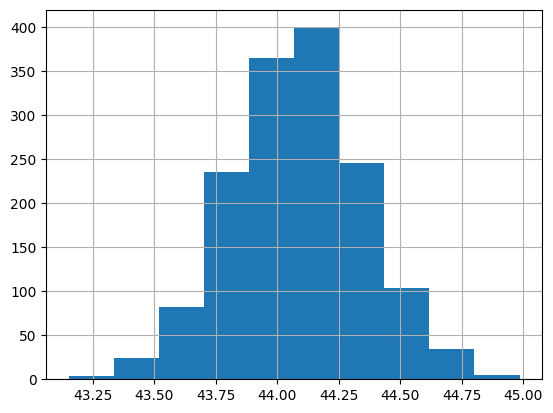

In [101]:
# Histograma de los promedios muestrales ‚Üí forma una distribuci√≥n normal
muestras.mean().hist()

> El **Teorema Central del L√≠mite** establece que, con el aumento del tama√±o de la muestra, la distribuci√≥n de las medias muestrales se aproxima a una distribuci√≥n normal con media igual a la media de la poblaci√≥n y una desviaci√≥n est√°ndar igual a la desviaci√≥n est√°ndar de la variable original dividida por la ra√≠z cuadrada del tama√±o de la muestra. Este hecho est√° asegurado para $n$ mayores o iguales a 30.

**Comparaciones con la poblaci√≥n normal**

In [102]:
# Media poblacional real
datos.Edad.mean()

np.float64(44.07142113482561)

In [105]:
# Media de las medias muestrales
muestras.mean().mean()

np.float64(44.08504)

> El **Teorema Central del L√≠mite** establece que, con el aumento del tama√±o de la muestra, la distribuci√≥n de las medias muestrales se aproxima a una distribuci√≥n normal con media igual a la media de la poblaci√≥n y una desviaci√≥n est√°ndar igual a la desviaci√≥n est√°ndar de la variable original dividida por la ra√≠z cuadrada del tama√±o de la muestra. Este hecho est√° asegurado para $n$ mayores o iguales a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

>üîπ Esto es el error est√°ndar estimado emp√≠ricamente
>
>üî∏ Representa cu√°nto var√≠an las medias de tus 1500 muestras respecto a la media general.

In [123]:
# Desviaci√≥n est√°ndar de las medias muestrales
# Estimar el error est√°ndar emp√≠ricamente
muestras.mean().std()
print(f'El error est√°ndar de las medias muestrales estimado emp√≠ricamente es de {muestras.mean().std():.4f} a√±os.')

El error est√°ndar de las medias muestrales estimado emp√≠ricamente es de 0.2681 a√±os.


>üîπ Es la desviaci√≥n est√°ndar real de la poblaci√≥n original (en este caso, la edad de las personas).
>
>üî∏ Representa cu√°n dispersas est√°n las edades individuales respecto a su media.

In [124]:
# Desviaci√≥n est√°ndar real: de la edad en la poblaci√≥n
# Ver cu√°n dispersas est√°n las edades individuales
datos.Edad.std()
print(f'La desviaci√≥n est√°ndar real de las edades en la poblaci√≥n es de {datos.Edad.std():.2f} a√±os.')

La desviaci√≥n est√°ndar real de las edades en la poblaci√≥n es de 12.48 a√±os.


>üîπ Es el error est√°ndar te√≥rico
>
>üî∏ Te dice cu√°nto esperamos que var√≠en las medias muestrales, si tom√°ramos muchas muestras de tama√±o n.

In [125]:
# Error est√°ndar (estimado te√≥ricamente): s / ‚àön
# Predecir cu√°nto variar√≠an las medias muestrales
datos.Edad.std() / np.sqrt(n)
print(f'El error est√°ndar estimado te√≥ricamente (œÉ / ‚àön) es de {datos.Edad.std() / np.sqrt(n):.4f} a√±os.')

El error est√°ndar estimado te√≥ricamente (œÉ / ‚àön) es de 0.2791 a√±os.


## <font color=green>4.2 Los niveles de confianza y significaci√≥n</font>
***

El **nivel de confianza** ($1 - \alpha$) representa la probabilidad de que la estimaci√≥n sea correcta. Adem√°s, el **nivel de significancia** ($\alpha$) expresa la probabilidad de error de la estimaci√≥n.

El **nivel de confianza** representa el grado de confiabilidad del resultado estimado dentro de un cierto rango. Cuando establecemos un **nivel de confianza del 95%** en una encuesta, por ejemplo, estamos asumiendo que existe una probabilidad del 95% de que los resultados de la encuesta representen bien la realidad, es decir, sean correctos.

El **nivel de confianza** de una estimaci√≥n se puede obtener del √°rea bajo la curva normal como se muestra en la figura siguiente.

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img007.png' width='450px'>


## <font color=green>4.3 Error inferencial</font>
***

El **error inferencial** se define por la **desviaci√≥n est√°ndar de las medias muestrales** $\sigma_\bar{x}$ y por el **nivel de confianza** determinado para el proceso.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confianza</font>
***

### Intervalo de confianza para la media poblacional

#### Con desviaci√≥n est√°ndar poblacional conocida

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Con desviaci√≥n est√°ndar de poblaci√≥n desconocida

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Ejemplo: </font>

Suponga que los pesos de las bolsas de arroz de una industria alimentaria se distribuyen aproximadamente como una poblaci√≥n normal con **desviaci√≥n est√°ndar igual a 150 g**. Se seleccion√≥ una **muestra aleatoria de 20 bolsas** de un lote espec√≠fico, se obtuvo un **peso promedio de 5.050 g**. Construya un intervalo de confianza para el **promedio de la poblaci√≥n** asumiendo un **nivel de significancia del 5%**.

### Media muestral

Se define la media del peso de arroz observada en la muestra (20 bolsas). Esta ser√° la base del intervalo de confianza.

In [126]:
# Se define la media muestral observada en las 20 bolsas
media_muestra = 5050
media_muestra  # Resultado: 5050

5050

### Nivel de significancia ($\alpha$)

El nivel de significancia indica el √°rea total que dejamos fuera del intervalo de confianza (en ambos extremos). En este caso, es 5%, o sea, dejamos un 2.5% en cada cola de la curva.

In [127]:
# Se establece el nivel de significancia (Œ±)
# Un nivel de confianza del 95% implica una significancia del 5% (0.05)
significancia = 0.05
significancia  # Resultado: 0.05

0.05

### Nivel de confianza ($1 - \alpha$)

Aqu√≠ se calcula que el 95% del √°rea bajo la curva corresponde al intervalo de confianza: es la zona gris central donde esperamos que est√© la media poblacional.

In [134]:
# Se calcula el nivel de confianza como complemento de la significancia
# Confianza = 1 - Œ± ‚Üí 1 - 0.05 = 0.95 (es decir, 95%)
confianza = 1 - significancia
confianza  # Resultado: 0.95

0.95

### Obteniendo $z$

Se muestra un fragmento de la tabla Z estandarizada, √∫til si queremos encontrar manualmente el valor cr√≠tico Z (como hiciste en tu imagen con el 1.9 + 0.06 = 1.96 para 95%).

In [129]:
# Se visualizan algunas filas de la tabla Z est√°ndar (no obligatorio)
# Esto permite buscar manualmente el valor cr√≠tico Z si no se usa scipy
tabla_normal_estandarizada[16:26]

Z       0.00    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08  \
1.60  0.9452  0.9463  0.9474  0.9484  0.9495  0.9505  0.9515  0.9525  0.9535   
1.70  0.9554  0.9564  0.9573  0.9582  0.9591  0.9599  0.9608  0.9616  0.9625   
1.80  0.9641  0.9649  0.9656  0.9664  0.9671  0.9678  0.9686  0.9693  0.9699   
1.90  0.9713  0.9719  0.9726  0.9732  0.9738  0.9744  0.9750  0.9756  0.9761   
2.00  0.9772  0.9778  0.9783  0.9788  0.9793  0.9798  0.9803  0.9808  0.9812   
2.10  0.9821  0.9826  0.9830  0.9834  0.9838  0.9842  0.9846  0.9850  0.9854   
2.20  0.9861  0.9864  0.9868  0.9871  0.9875  0.9878  0.9881  0.9884  0.9887   
2.30  0.9893  0.9896  0.9898  0.9901  0.9904  0.9906  0.9909  0.9911  0.9913   
2.40  0.9918  0.9920  0.9922  0.9925  0.9927  0.9929  0.9931  0.9932  0.9934   
2.50  0.9938  0.9940  0.9941  0.9943  0.9945  0.9946  0.9948  0.9949  0.9951   

Z       0.09  
1.60  0.9545  
1.70  0.9633  
1.80  0.9706  
1.90  0.9767  
2.00  0.9817  
2.10  0.9857  
2.20  0.9890  
2.30  0.9916  
2.40  0.9936  
2.50  0.9952

### Obteniendo $z$

<img src='https://caelum-online-public.s3.amazonaws.com/ESP-1764-estadistica-con-python-probabilidad-y-muestreo/img008.png' width='450px'>

Se obtiene la mitad del √°rea del intervalo de confianza, ya que este se reparte en ambos lados de la media.

In [138]:
# C√°lculo de la mitad del nivel de confianza (para un intervalo bilateral)
mitad_nivel_confianza = confianza / 2

Se calcula el √°rea total a la izquierda del valor cr√≠tico Z (95% / 2 + 50%), que corresponde a 0.975.

In [139]:
# Se suma 0.5 + 0.475 para obtener el √°rea acumulada hasta Z
# Esto da 0.975, que representa la probabilidad acumulada a la izquierda de Z
0.5 + (mitad_nivel_confianza)  # Resultado: 0.975

0.975

Ejemplo de c√≥mo se puede buscar el valor Z manualmente en la tabla.

In [140]:
# Este paso es auxiliar: si usas la tabla Z manualmente,
# puedes buscar Z que corresponde a un √°rea de 0.975
# Por ejemplo, fila 1.9 y columna 0.06 ‚Üí Z = 1.96
1.9 + 0.06  # Resultado: 1.96 (valor cr√≠tico Z aproximado)

1.96

Forma m√°s precisa y autom√°tica de obtener el valor Z. ppf significa ‚Äúpercent point function‚Äù, es decir, el valor Z que deja a su izquierda el √°rea deseada (0.975 en este caso).

In [141]:
# IMPORTANTE: obtener el valor cr√≠tico Z de forma autom√°tica con scipy
# norm.ppf(0.975) devuelve el valor Z cuyo √°rea acumulada (izquierda) es 0.975
from scipy.stats import norm
z = norm.ppf(0.975)
z  # Resultado: 1.959963984540054 (aproximadamente 1.96)

np.float64(1.959963984540054)

In [142]:
norm.ppf(0.5 + (confianza / 2))

np.float64(1.959963984540054)

**Simplificando ser√≠a:**

In [143]:
from scipy.stats import norm
# z es el valor cr√≠tico Z correspondiente a un intervalo de confianza del 95% en una distribuci√≥n normal est√°ndar.
confianza = 0.95  # Nivel de confianza del 95%
z = norm.ppf(0.5 + (confianza / 2))  # Esto da norm.ppf(0.975)
print(z)  # Resultado: ~1.96

1.959963984540054


### Valores de $z$ para los niveles de confianza m√°s utilizados

|Nivel de<br>confianza|Valor del √°rea bajo<br>la curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0.95                               |1.645|
|95%               |0.975                              |1.96 |
|99%               |0.995                              |2.575|

### Obteniendo $\sigma_\bar{x}$

La desviaci√≥n est√°ndar nos indica qu√© tanto var√≠an los valores individuales (pesos de las bolsas) respecto a la media poblacional. En este caso, ya viene dada: 150 gramos.

In [144]:
# Se define la desviaci√≥n est√°ndar poblacional seg√∫n el enunciado del ejercicio.
desviacion_estandar = 150
desviacion_estandar  # Resultado: 150

150

Se seleccionaron 20 bolsas al azar. Este n√∫mero se usa para calcular el error est√°ndar.

In [145]:
# Se define el tama√±o de la muestra, que corresponde al n√∫mero de bolsas seleccionadas.
n = 20
n  # Resultado: 20

20

El 95% de confianza indica que, si tom√°ramos muchas muestras, el 95% de los intervalos construidos incluir√≠an la media poblacional real.

In [161]:
# Se declara nuevamente el nivel de confianza (95%) por si no se hab√≠a definido anteriormente.
confianza = 0.95
confianza  # Resultado: 0.95

0.95

Se usa esta ra√≠z para obtener el error est√°ndar (œÉ‚ÇìÃÑ).

In [146]:
# Se calcula la ra√≠z cuadrada del tama√±o de la muestra.
raiz_de_n = np.sqrt(n)
raiz_de_n  # Resultado: 4.4721...

np.float64(4.47213595499958)

Este valor nos dice cu√°nto puede variar el promedio de los pesos de las muestras respecto a la media poblacional. Cuanto mayor n, menor el error est√°ndar.

In [163]:
# Se calcula el error est√°ndar de la media: cu√°nto tiende a variar el promedio de las muestras.
sigma = desviacion_estandar / raiz_de_n
sigma  # Resultado: 33.5410...

np.float64(33.54101966249684)

### Obteniendo $e$

El margen de error indica cu√°nto puede alejarse la media muestral de la media poblacional.

Con z‚âà1.96, se multiplica por el error est√°ndar de la media para estimar el "rango de confianza".

In [164]:
# Se calcula el margen de error (e) multiplicando el valor cr√≠tico Z por el error est√°ndar.
e = z * sigma
e  # Resultado: 65.7391...

np.float64(65.73919054324361)

### Soluci√≥n 1 - Calculando el intervalo de confianza para la media
---
---
Soluci√≥n Manual (usando suma y resta)

Esto nos da el rango estimado donde probablemente est√© el promedio real del lote de arroz, con un 95% de confianza.

In [150]:
# Se construye el intervalo de confianza sumando y restando el margen de error a la media muestral.
intervalo = (
    media_muestra - e,
    media_muestra + e
)
intervalo  # Resultado: (4984.26, 5115.73)

(np.float64(4984.260809456757), np.float64(5115.739190543243))

### Soluci√≥n 2 - Calculando el intervalo de confianza para la media
---
---
Soluci√≥n Autom√°tica con scipy

Esta funci√≥n hace lo mismo que la soluci√≥n manual, pero autom√°ticamente.
Usa los par√°metros:

* confidence: nivel de confianza (95%)

* loc: media muestral

* scale: sigma (error est√°ndar)

Nos devuelve el mismo resultado: un intervalo de confianza del 95%.

In [165]:
# Se calcula el intervalo de confianza autom√°ticamente usando la funci√≥n de scipy.
norm.interval(confidence = confianza, loc = media_muestra, scale = sigma)
# Resultado: (4984.26, 5115.73)

(np.float64(4984.260809456757), np.float64(5115.739190543243))

**Ejercicio**

Para estimar la cantidad media gastada por cada cliente de una gran cadena de comida r√°pida, se seleccion√≥ una muestra de 50 clientes.

Suponiendo que el valor de la desviaci√≥n est√°ndar de la poblaci√≥n es de $ 6,00 y que esta poblaci√≥n se distribuye normalmente, obtenga el margen de error de esta estimaci√≥n para un nivel de confianza del 95%.

In [167]:
from scipy.stats import norm
import numpy as np

# Se define el tama√±o de la muestra: se seleccionaron 50 clientes
n = 50

# Se establece la desviaci√≥n est√°ndar de la poblaci√≥n, que es de $6 seg√∫n el enunciado
desviacion_estandar = 6

# Se define el nivel de confianza deseado: 95%
confianza = 0.95

# Se calcula el valor cr√≠tico Z, que delimita la regi√≥n central del 95% de probabilidad bajo la curva normal
# Esto equivale a buscar el punto z tal que el √°rea acumulada a su izquierda sea 0.975 (0.5 + 0.95 / 2)
z = norm.ppf(0.5 + (confianza / 2))

# Se calcula la ra√≠z cuadrada del tama√±o de la muestra, necesaria para el error est√°ndar
raiz_de_n = np.sqrt(n)

# Se calcula el error est√°ndar dividiendo la desviaci√≥n est√°ndar por la ra√≠z del tama√±o de la muestra
sigma = desviacion_estandar / raiz_de_n

# Se calcula el margen de error multiplicando el valor Z por el error est√°ndar
e = z * sigma

# Se imprime el margen de error, con una explicaci√≥n clara del resultado
print(f"El margen de error para estimar la cantidad media gastada por cliente es de aproximadamente ${e:.2f}.")
print(f"Con un nivel de confianza del 95%, la estimaci√≥n puede variar en ¬±{e:.2f} d√≥lares.")

El margen de error para estimar la cantidad media gastada por cliente es de aproximadamente $1.66.
Con un nivel de confianza del 95%, la estimaci√≥n puede variar en ¬±1.66 d√≥lares.


**Ejercicio 2**

Una muestra aleatoria simple de 1976 elementos de una poblaci√≥n distribuida normalmente, con una desviaci√≥n est√°ndar de 11, dio como resultado una media muestral de 28.

¬øCu√°l es el intervalo de confianza del 90% para la media de la poblaci√≥n?

In [169]:
from scipy.stats import norm
import numpy as np

# Tama√±o de la muestra
n = 1976

# Nivel de confianza del 90%
confianza = 0.9

# Media muestral observada
media_muestra = 28

# Desviaci√≥n est√°ndar poblacional
desviacion_estandar = 11

# Ra√≠z cuadrada de n
raiz_de_n = np.sqrt(n)

# Error est√°ndar
sigma = desviacion_estandar / raiz_de_n

# Intervalo de confianza usando distribuci√≥n normal
intervalo = norm.interval(confidence = confianza, loc = media_muestra, scale = sigma)

# Resultado final
print(f"Con un 90% de confianza, la media poblacional est√° entre {intervalo[0]:.2f} y {intervalo[1]:.2f}")

Con un 90% de confianza, la media poblacional est√° entre 27.59 y 28.41


# <font color=green>5 C√ÅLCULO DEL TAMA√ëO DE LA MUESTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudiando los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil. Nuestro supervisor determin√≥ que el **error m√°ximo en relaci√≥n a la media es de R$\$$ 10,00**. Sabemos que la **desviaci√≥n est√°ndar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79**. Para un **nivel de confianza del 95%**, ¬øcu√°l deber√≠a ser el tama√±o de la muestra de nuestro estudio?

## <font color=green>5.1 Variables cuantitativas y poblaci√≥n infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Con desviaci√≥n est√°ndar conocida

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Con desviaci√≥n est√°ndar desconocida

## $$n = \left(z\frac{s}{e}\right)^2$$

Donde:

$z$ = variable normal estandarizada

$\sigma$ = desviaci√≥n est√°ndar poblacional

$s$ = desviaci√≥n est√°ndar de la muestra

$e$ = error inferencial

### <font color='red'>Comentarios</font>

1. La desviaci√≥n est√°ndar ($\sigma$ o $s$) y el error ($e$) deben estar en la misma unidad de medida.

2. Cuando el error ($e$) se representa en t√©rminos porcentuales, debe interpretarse como un porcentaje relacionado con el promedio.

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando los ingresos mensuales de los jefes de hogar. Nuestro supervisor determin√≥ que el **error m√°ximo en relaci√≥n a la media es de $\$$ 100,00** pesos. Sabemos que la **desviaci√≥n est√°ndar poblacional** de este grupo de trabajadores es **$\$$ 3.323,39** pesos. Para un **nivel de confianza del 95%**, ¬øcu√°l deber√≠a ser el tama√±o de la muestra de nuestro estudio?

### Obteniendo $\sigma$

### Obteniendo $e$

### Obteniendo $n$

---
---

## <font color='red'>Problema</font>

En un lote de **10 000 latas** de gaseosa, se realiz√≥ una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviaci√≥n est√°ndar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error m√°ximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¬øqu√© tama√±o de muestra se debe seleccionar para este estudio?

## <font color=green>5.2 Variables cuantitativas y poblaci√≥n finita</font>
***

#### Con desviaci√≥n est√°ndar conocida

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Con desviaci√≥n est√°ndar desconocida

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Donde:

$N$ = tama√±o de la poblaci√≥n

$z$ = variable normal estandarizada

$\sigma$ = desviaci√≥n est√°ndar poblacional

$s$ = desviaci√≥n est√°ndar muestral

$e$ = error inferencial

## <font color='blue'>Ejemplo: Industria de refrescos</font>

En un lote de **10 000 latas** de gaseosa, se realiz√≥ una muestra aleatoria simple de **100 latas** y se obtuvo que la **desviaci√≥n est√°ndar muestral del contenido de las latas es igual a 12 ml**. El fabricante estipula un **error m√°ximo en la media poblacional de solo 5 ml**. Para garantizar un **nivel de confianza del 95%**, ¬øqu√© tama√±o de muestra se debe seleccionar para este estudio?

### Obteniendo $N$

### Obteniendo $z$

### Obteniendo $s$

### Obteniendo $e$

### Obteniendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

# <font color=green>6 FIJANDO EL CONTENIDO</font>
***

## <font color='blue'>Ejemplo: Rendimiento medio</font>

Estamos estudiando **los ingresos mensuales de los jefes de hogar con ingresos de hasta R$\$$ 5.000,00 en Brasil**. Nuestro supervisor determin√≥ que el **error m√°ximo en relaci√≥n a la media es de R$\$$ 10,00**. Sabemos que la **desviaci√≥n est√°ndar poblacional** de este grupo de trabajadores es **R$\$$ 1.082,79** y que la **media poblacional** es **R$\$$ 1.426,54**. Para un **nivel de confianza del 95%**, ¬øcu√°l deber√≠a ser el tama√±o de la muestra de nuestro estudio? ¬øCu√°l es el intervalo de confianza para la media considerando el tama√±o de muestra obtenido?

### Construyendo el conjunto de datos seg√∫n lo especificado por el problema

### Calcular el tama√±o de la muestra

### Calcular el intervalo de confianza para la media

### Realizaci√≥n de una prueba gr√°fica